In [1]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt

#Path
#Insert your local repo path to file 
repo_path = "INSERT YOUR LOCAL SDC-SECURITY REPO PATH HERE"
repo_path ='D:\Archivos\Social Data Challenge\sdc-security'

In [2]:
cuau_path = "\datasets\cuau_homologated.csv.zip"

zf = zipfile.ZipFile(repo_path+cuau_path) 
cuau = pd.read_csv(zf.open('cuau_homologated.csv'))
cuau.head()

,idcarpeta,delito,categoria,alcaldia,colonia,sexo_fem,edad,tipopersona,calidadjuridica,anio_denuncia,...,colonia_alt,crimen_lat,crimen_lon,hecho_time,denuncia_time,cve_col,clasif,alc,cve_alc,polygon
0,8324479,ROBO A TRANSEUNTE A BORDO DE TAXI PUBLICO Y PR...,DELITO DE BAJO IMPACTO,CUAUHTEMOC,DOCTORES,0,39,FISICA,VICTIMA Y DENUNCIANTE,2019,...,DOCTORES I,19.42244,-99.15237,2018-12-25 04:00:00,2019-01-04 13:16:00,015-010,COLONIA,CUAUHTEMOC,15,"[[-99.15519890116673, 19.40656058216308], [-99..."
1,8324482,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,MORELOS,0,40,FISICA,OFENDIDO,2019,...,MORELOS II,19.44962,-99.12782,2018-12-23 10:00:00,2019-01-04 13:19:00,015-019,COLONIA,CUAUHTEMOC,15,"[[-99.13938480039275, 19.44401178894581], [-99..."
2,8324485,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,ROMA NORTE,0,37,FISICA,OFENDIDO,2019,...,ROMA NORTE III,19.41359,-99.15729,2018-12-31 11:00:00,2019-01-04 13:23:00,015-024,COLONIA,CUAUHTEMOC,15,"[[-99.17671177030077, 19.420286327194944], [-9..."
3,8324496,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CUAUHTEMOC,JUAREZ,0,36,FISICA,VICTIMA Y DENUNCIANTE,2019,...,JUAREZ,19.42676,-99.16640,2019-01-03 15:00:00,2019-01-04 13:35:00,015-017,COLONIA,CUAUHTEMOC,15,"[[-99.17571912544206, 19.422519931378844], [-9..."
4,8324527,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CUAUHTEMOC,GUERRERO,0,32,FISICA,VICTIMA Y DENUNCIANTE,2019,...,GUERRERO III,19.43769,-99.14753,2018-12-22 18:34:00,2019-01-04 13:59:00,015-014,COLONIA,CUAUHTEMOC,15,"[[-99.14910747563131, 19.437890366845085], [-9..."


In [3]:
#Counting crimes in district Cuauhtemoc
colonias_crimes = {item: (cuau['colonia'] == str(item)).sum() for item in cuau.colonia.unique()}
ordered = dict(sorted(colonias_crimes.items(), key=lambda item: item[1], reverse=True))
ordered


{'CENTRO': 28047,
 'DOCTORES': 17081,
 'ROMA NORTE': 10538,
 'JUAREZ': 7626,
 'BUENAVISTA': 6941,
 'GUERRERO': 6852,
 'SANTA MARIA LA RIBERA': 5594,
 'MORELOS': 5439,
 'OBRERA': 5091,
 'CUAUHTEMOC': 4479,
 'HIPODROMO': 4179,
 'ROMA SUR': 4043,
 'SAN RAFAEL': 2977,
 'NONOALCO TLATELOLCO': 2852,
 'TABACALERA': 2696,
 'PERALVILLO': 2265,
 'TRANSITO': 2166,
 'CONDESA': 1758,
 'SAN SIMON TOLNAHUAC': 1681,
 'EX HIPODROMO DE PERALVILLO': 1605,
 'ATLAMPA': 1404,
 'AMPL. ASTURIAS': 1107,
 'VISTA ALEGRE': 1102,
 'ALGARIN': 911,
 'HIPODROMO CONDESA': 869,
 'BUENOS AIRES': 826,
 'VALLE GOMEZ': 602,
 'ASTURIAS': 482,
 'SANTA MARIA INSURGENTES': 470,
 'ESPERANZA': 464,
 'PAULINO NAVARRO': 435,
 'MAZA': 401,
 'FELIPE PESCADOR': 232}

In [5]:
import json

categorias = {item: (cuau['categoria'] == str(item)).sum() \
              for item in cuau.categoria.unique()}

categorias = {key: value.tolist() if isinstance(value, np.int64) else value \
              for key, value in categorias.items()}

categorias_ord = dict(sorted(categorias.items(), 
                             key=lambda item: item[1], 
                             reverse=True))

print(json.dumps(categorias_ord, indent = 2))

##

bajo_impacto = {item: (cuau['delito'] == str(item)).sum() \
                for item in cuau.loc[cuau["categoria"] == "DELITO DE BAJO IMPACTO",
                                     'delito'].unique()}

bajo_impacto = {key: value.tolist() if isinstance(value, np.int64) \
                else value for key, value in bajo_impacto.items()}

bajo_impacto_ord = dict(sorted(bajo_impacto.items(), 
                               key=lambda item: item[1], 
                               reverse=True))

print(json.dumps(bajo_impacto_ord, indent=2))


{
  "DELITO DE BAJO IMPACTO": 114818,
  "ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIOLENCIA": 7068,
  "ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA": 2346,
  "ROBO DE VEHICULO CON Y SIN VIOLENCIA": 2126,
  "ROBO A NEGOCIO CON VIOLENCIA": 2126,
  "HECHO NO DELICTIVO": 1937,
  "VIOLACION": 715,
  "ROBO A REPARTIDOR CON Y SIN VIOLENCIA": 673,
  "HOMICIDIO DOLOSO": 571,
  "LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO": 252,
  "ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA": 176,
  "ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA": 167,
  "ROBO A CASA HABITACION CON VIOLENCIA": 125,
  "ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA": 79,
  "ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA": 23,
  "SECUESTRO": 13
}
{
  "FRAUDE": 14958,
  "VIOLENCIA FAMILIAR": 9661,
  "ROBO DE OBJETOS": 9065,
  "AMENAZAS": 8097,
  "ROBO DE ACCESORIOS DE AUTO": 7513,
  "ROBO A NEGOCIO SIN VIOLENCIA": 5502,
  "NARCOMENUDEO POSESION SIMPLE": 3349,
  "ROBO DE OBJETOS DEL INTERIOR DE UN VEHICU

<AxesSubplot: >

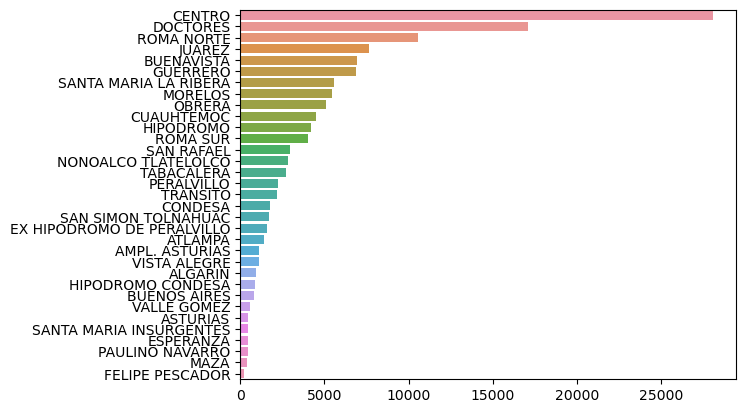

In [6]:
import seaborn as sns
#USING PANDAS
#cuau['colonia'].value_counts().head(20).sort_index().plot.barh()

#USING SEABORN
keys= list(ordered.keys())
vals = [ordered[k] for k in keys]
sns.barplot(x=vals,y=keys, orient ='h')


20 *colonias* with higher amount of crimes

<AxesSubplot: >

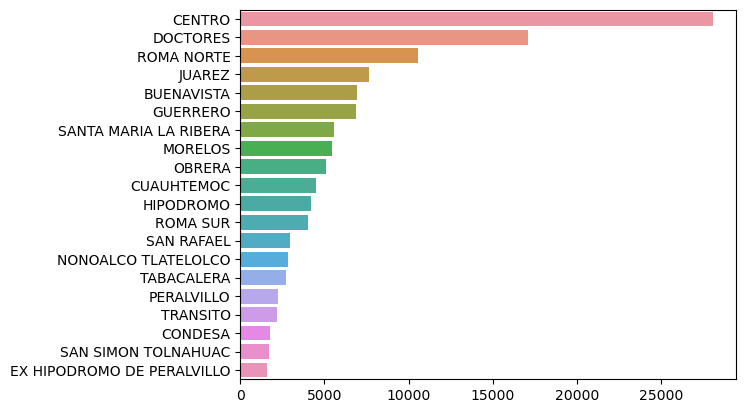

In [11]:
keys= list(ordered.keys())[:20]
vals = [ordered[k] for k in keys]
sns.barplot(x=vals ,y= keys, orient ='h')


In [12]:
cuau_delitos = cuau.groupby(['colonia','categoria','delito']).size().reset_index(name ='count').copy()
cuau_delitos= cuau_delitos.sort_values(by = ['count'], ascending = False)

cuau_delitos

,colonia,categoria,delito,count
1202,DOCTORES,DELITO DE BAJO IMPACTO,FRAUDE,4307
716,CENTRO,DELITO DE BAJO IMPACTO,FRAUDE,2845
791,CENTRO,DELITO DE BAJO IMPACTO,ROBO DE OBJETOS,2069
761,CENTRO,DELITO DE BAJO IMPACTO,ROBO A NEGOCIO SIN VIOLENCIA,1610
668,CENTRO,DELITO DE BAJO IMPACTO,AMENAZAS,1604
...,...,...,...,...
2693,OBRERA,HECHO NO DELICTIVO,PERDIDA DE LA VIDA POR CAIDA,1
649,BUENOS AIRES,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CO...,1
3568,SAN SIMON TOLNAHUAC,VIOLACION,VIOLACION EQUIPARADA,1
2692,OBRERA,HECHO NO DELICTIVO,PERDIDA DE LA VIDA POR ACCIDENTE LABORAL,1


In [13]:
cuau_delitos.head(20)

,colonia,categoria,delito,count
1202,DOCTORES,DELITO DE BAJO IMPACTO,FRAUDE,4307
716,CENTRO,DELITO DE BAJO IMPACTO,FRAUDE,2845
791,CENTRO,DELITO DE BAJO IMPACTO,ROBO DE OBJETOS,2069
761,CENTRO,DELITO DE BAJO IMPACTO,ROBO A NEGOCIO SIN VIOLENCIA,1610
668,CENTRO,DELITO DE BAJO IMPACTO,AMENAZAS,1604
822,CENTRO,DELITO DE BAJO IMPACTO,VIOLENCIA FAMILIAR,1596
870,CENTRO,ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1556
3041,ROMA NORTE,DELITO DE BAJO IMPACTO,ROBO DE ACCESORIOS DE AUTO,1507
2330,MORELOS,DELITO DE BAJO IMPACTO,NARCOMENUDEO POSESION SIMPLE,1410
2068,JUAREZ,DELITO DE BAJO IMPACTO,FRAUDE,1260


In [14]:
def heatmap(heatmap_data,title,xlabel, ylabel):
    # Create the heatmap
    plt.figure(figsize=(20, 16))
    sns.heatmap(heatmap_data, annot=False, fmt='d', cmap='YlGnBu', linewidths=0.5, \
                xticklabels=[label[:35] + '...' if len(label) > 35 else label for label in heatmap_data.columns],
                yticklabels=[label[:35] + '...' if len(label) > 35 else label for label in heatmap_data.index])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [15]:
heatmap_data = cuau_delitos.pivot_table(index='categoria', columns='colonia', values='count', fill_value=0,aggfunc='sum')


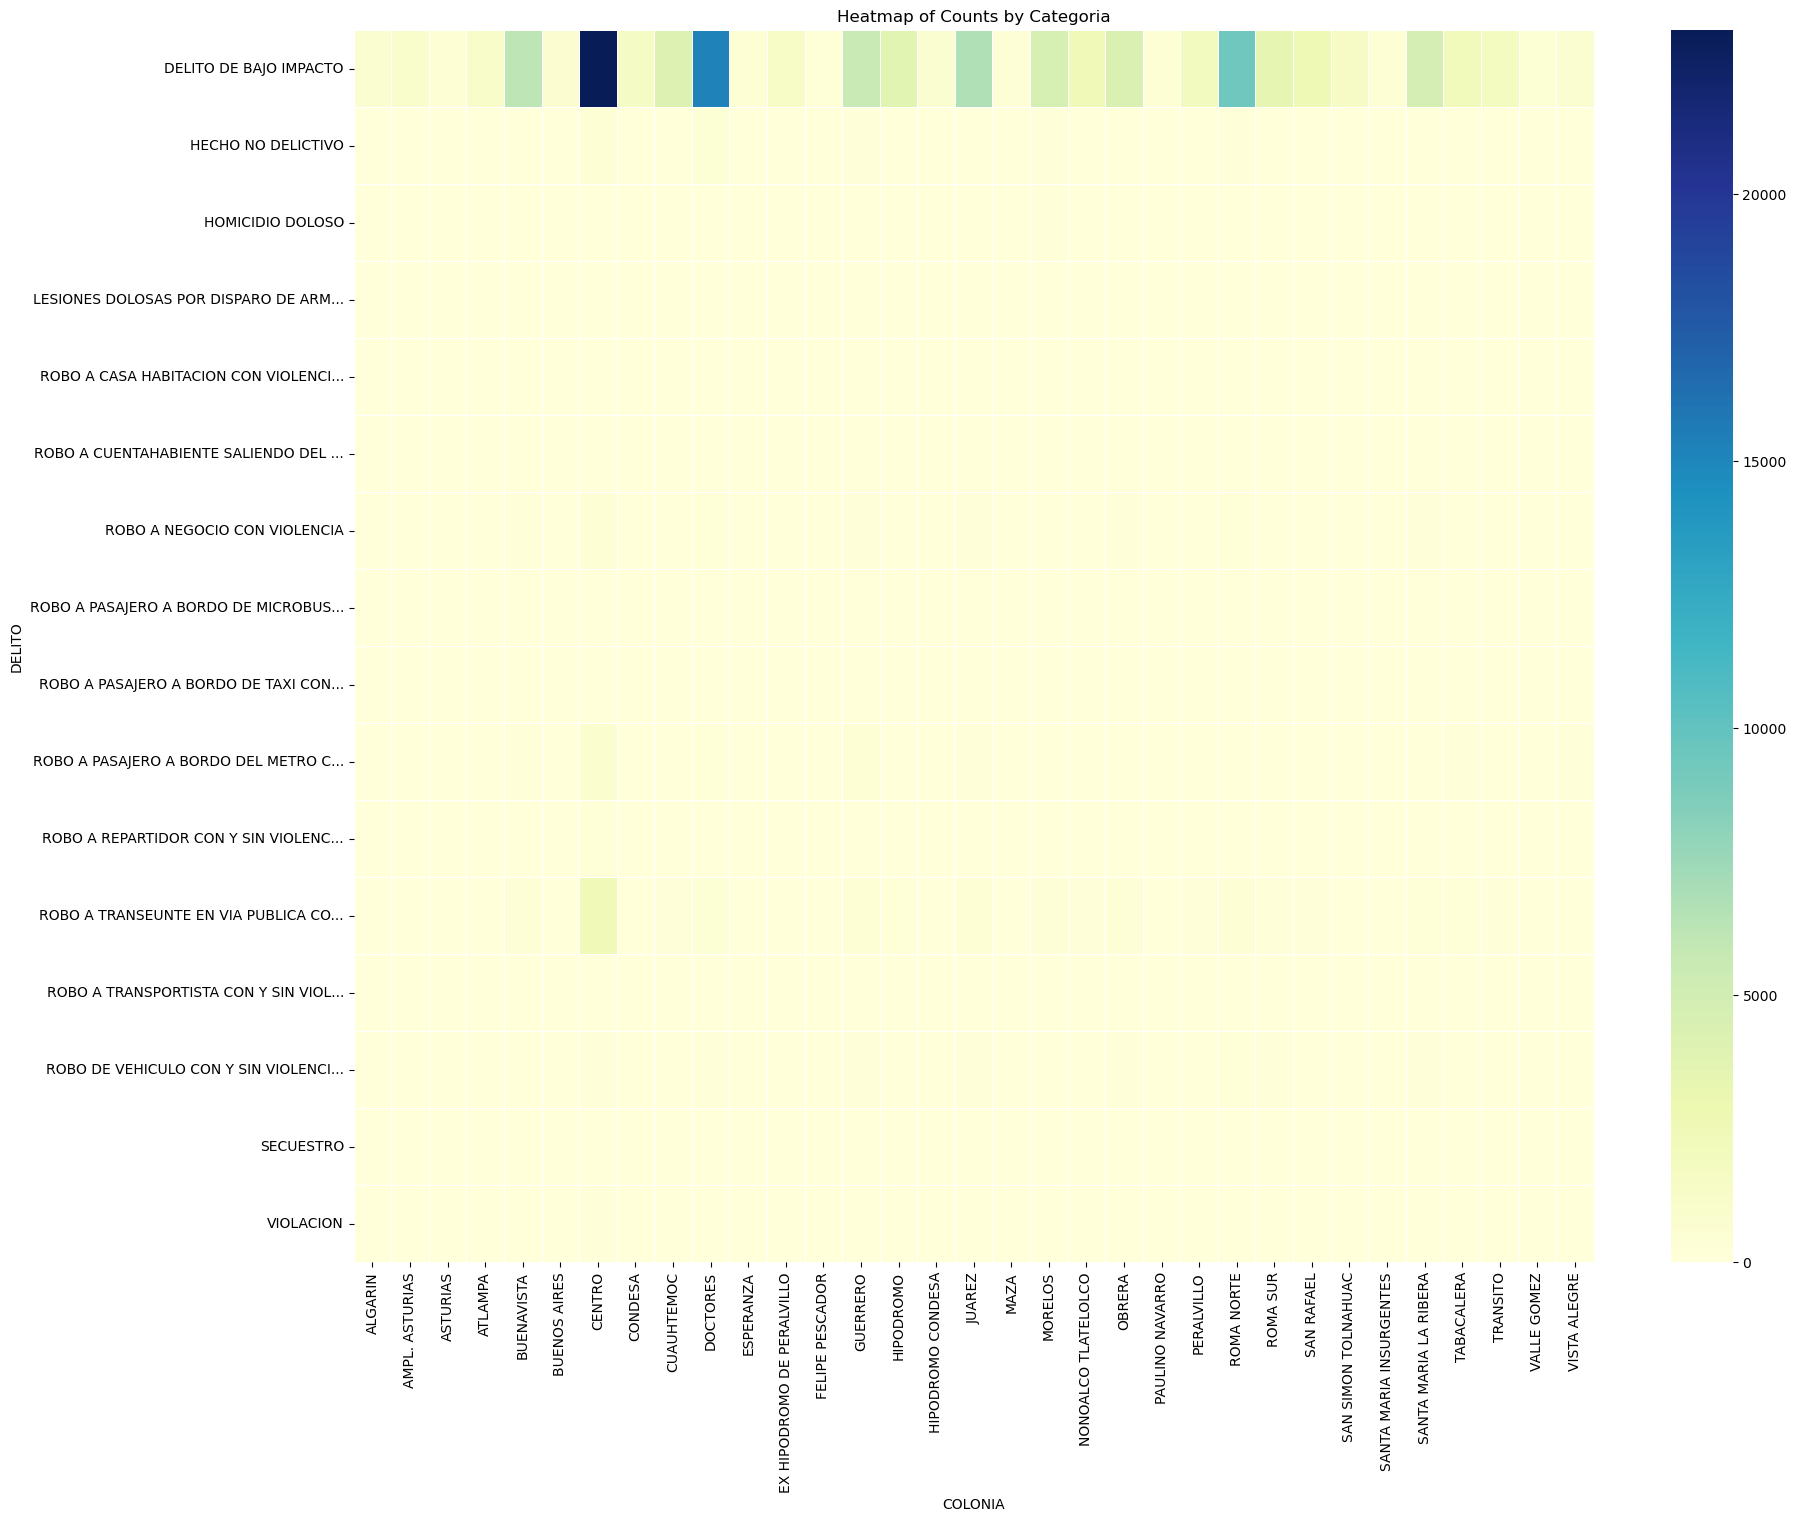

In [16]:
heatmap(heatmap_data, 'Heatmap of Counts by Categoria','COLONIA','DELITO')


There is plenty of crimes with *categoria* "DELITO DE BAJO IMPACTO". A heatmap without those crimes will be created, as well as another with only crimes related to this category, so that we can get a better understanding of what is happening on each *colonia* .

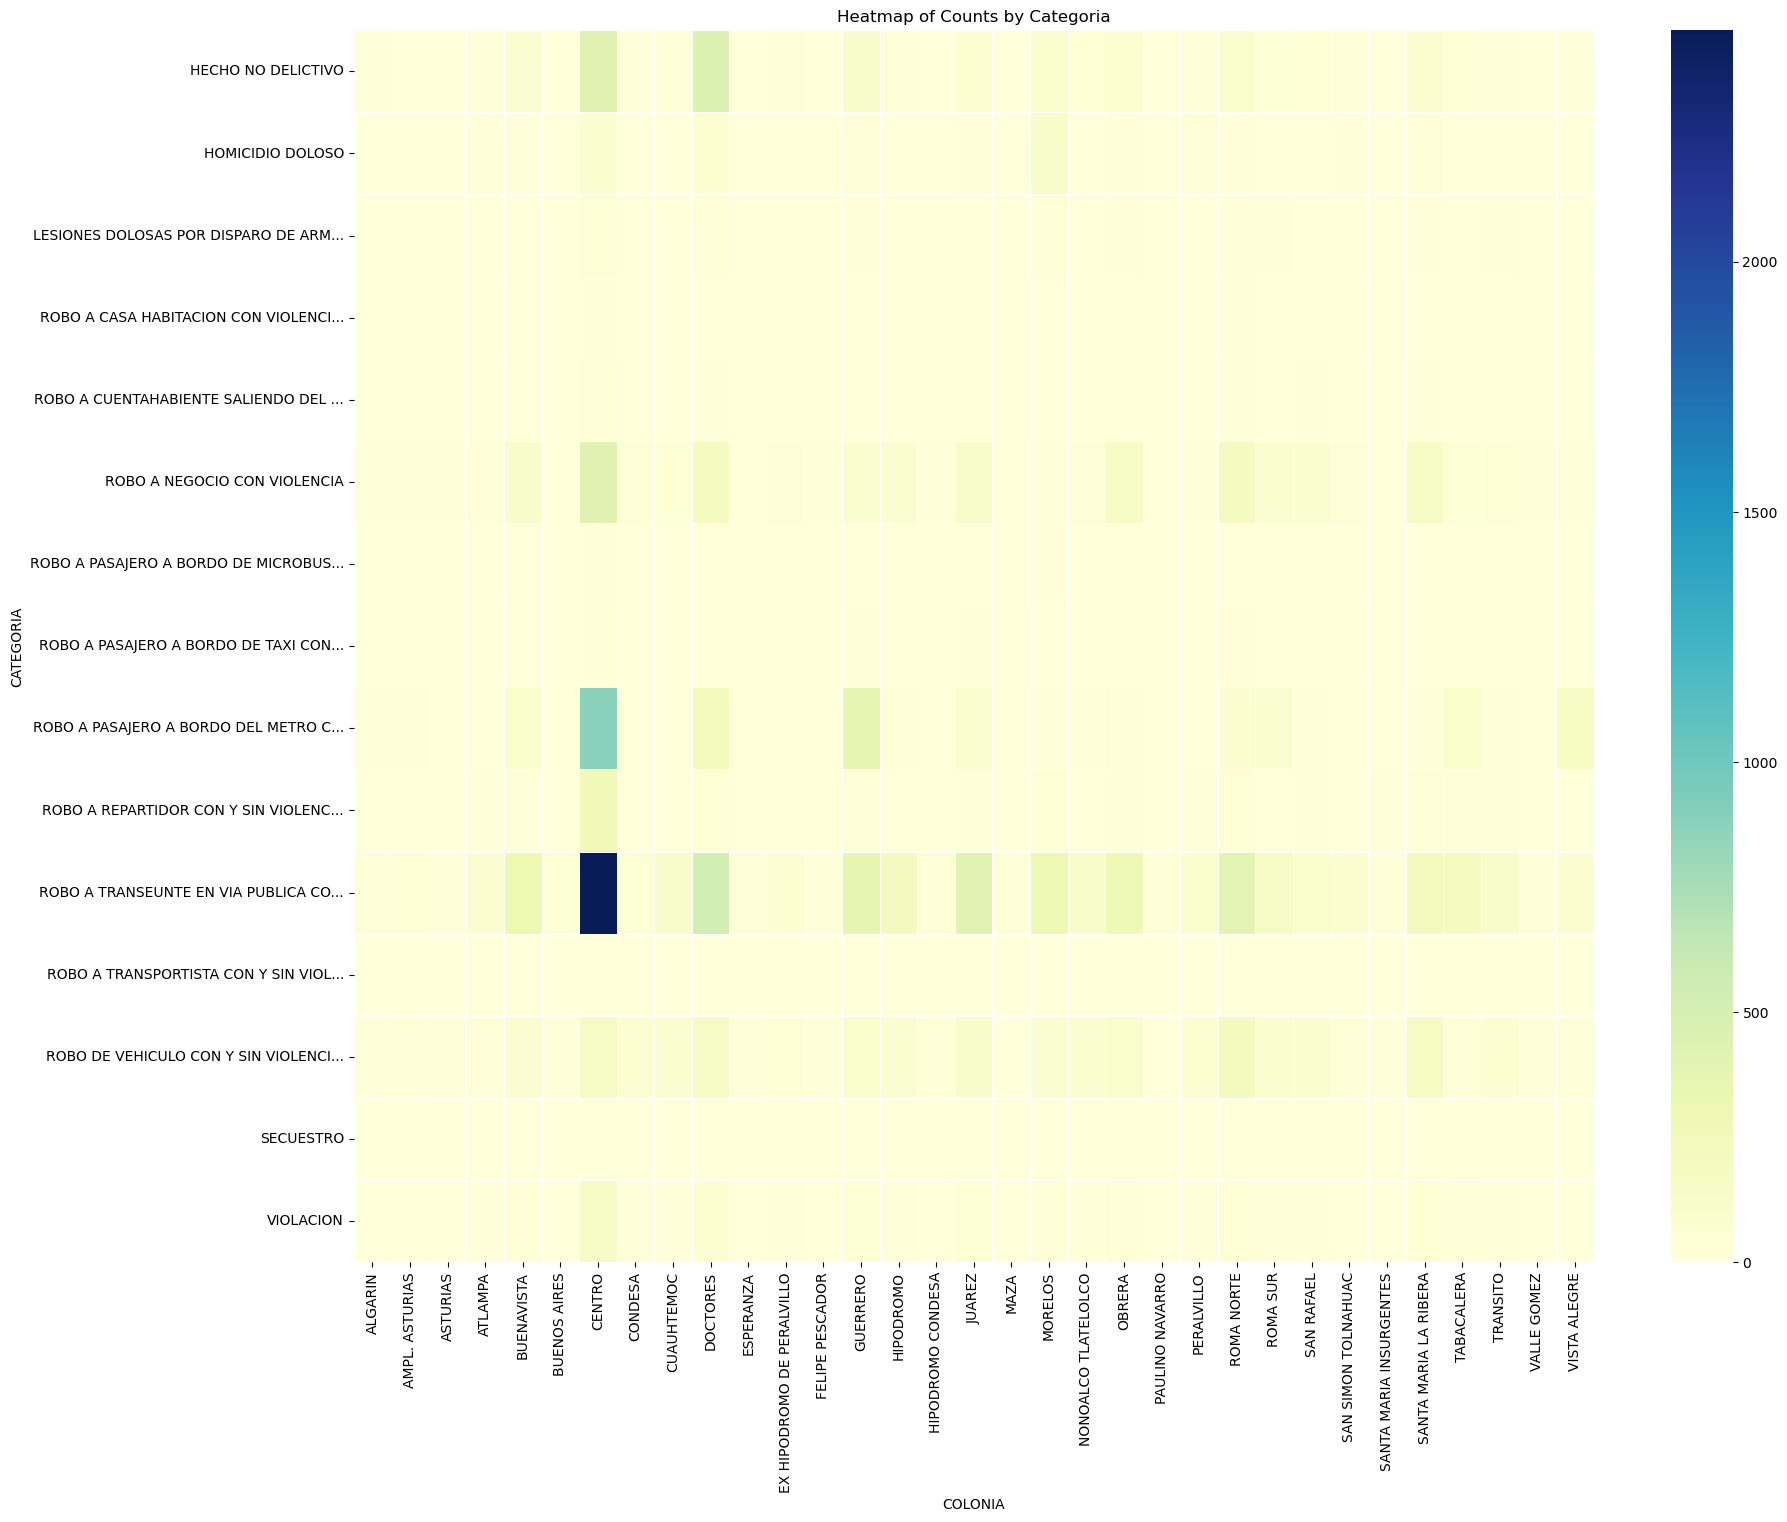

In [17]:

values_to_drop = ['DELITO DE BAJO IMPACTO']
rows_to_drop = heatmap_data.index.isin(values_to_drop)
heatmap(heatmap_data[~rows_to_drop], 'Heatmap of Counts by Categoria','COLONIA','CATEGORIA')


In [18]:
cuau_bajo = cuau_delitos[cuau_delitos.categoria.isin(['DELITO DE BAJO IMPACTO'])].sort_values(by = 'count', ascending = False).copy()
cuau_bajo.head(10)

,colonia,categoria,delito,count
1202,DOCTORES,DELITO DE BAJO IMPACTO,FRAUDE,4307
716,CENTRO,DELITO DE BAJO IMPACTO,FRAUDE,2845
791,CENTRO,DELITO DE BAJO IMPACTO,ROBO DE OBJETOS,2069
761,CENTRO,DELITO DE BAJO IMPACTO,ROBO A NEGOCIO SIN VIOLENCIA,1610
668,CENTRO,DELITO DE BAJO IMPACTO,AMENAZAS,1604
822,CENTRO,DELITO DE BAJO IMPACTO,VIOLENCIA FAMILIAR,1596
3041,ROMA NORTE,DELITO DE BAJO IMPACTO,ROBO DE ACCESORIOS DE AUTO,1507
2330,MORELOS,DELITO DE BAJO IMPACTO,NARCOMENUDEO POSESION SIMPLE,1410
2068,JUAREZ,DELITO DE BAJO IMPACTO,FRAUDE,1260
1304,DOCTORES,DELITO DE BAJO IMPACTO,VIOLENCIA FAMILIAR,1260


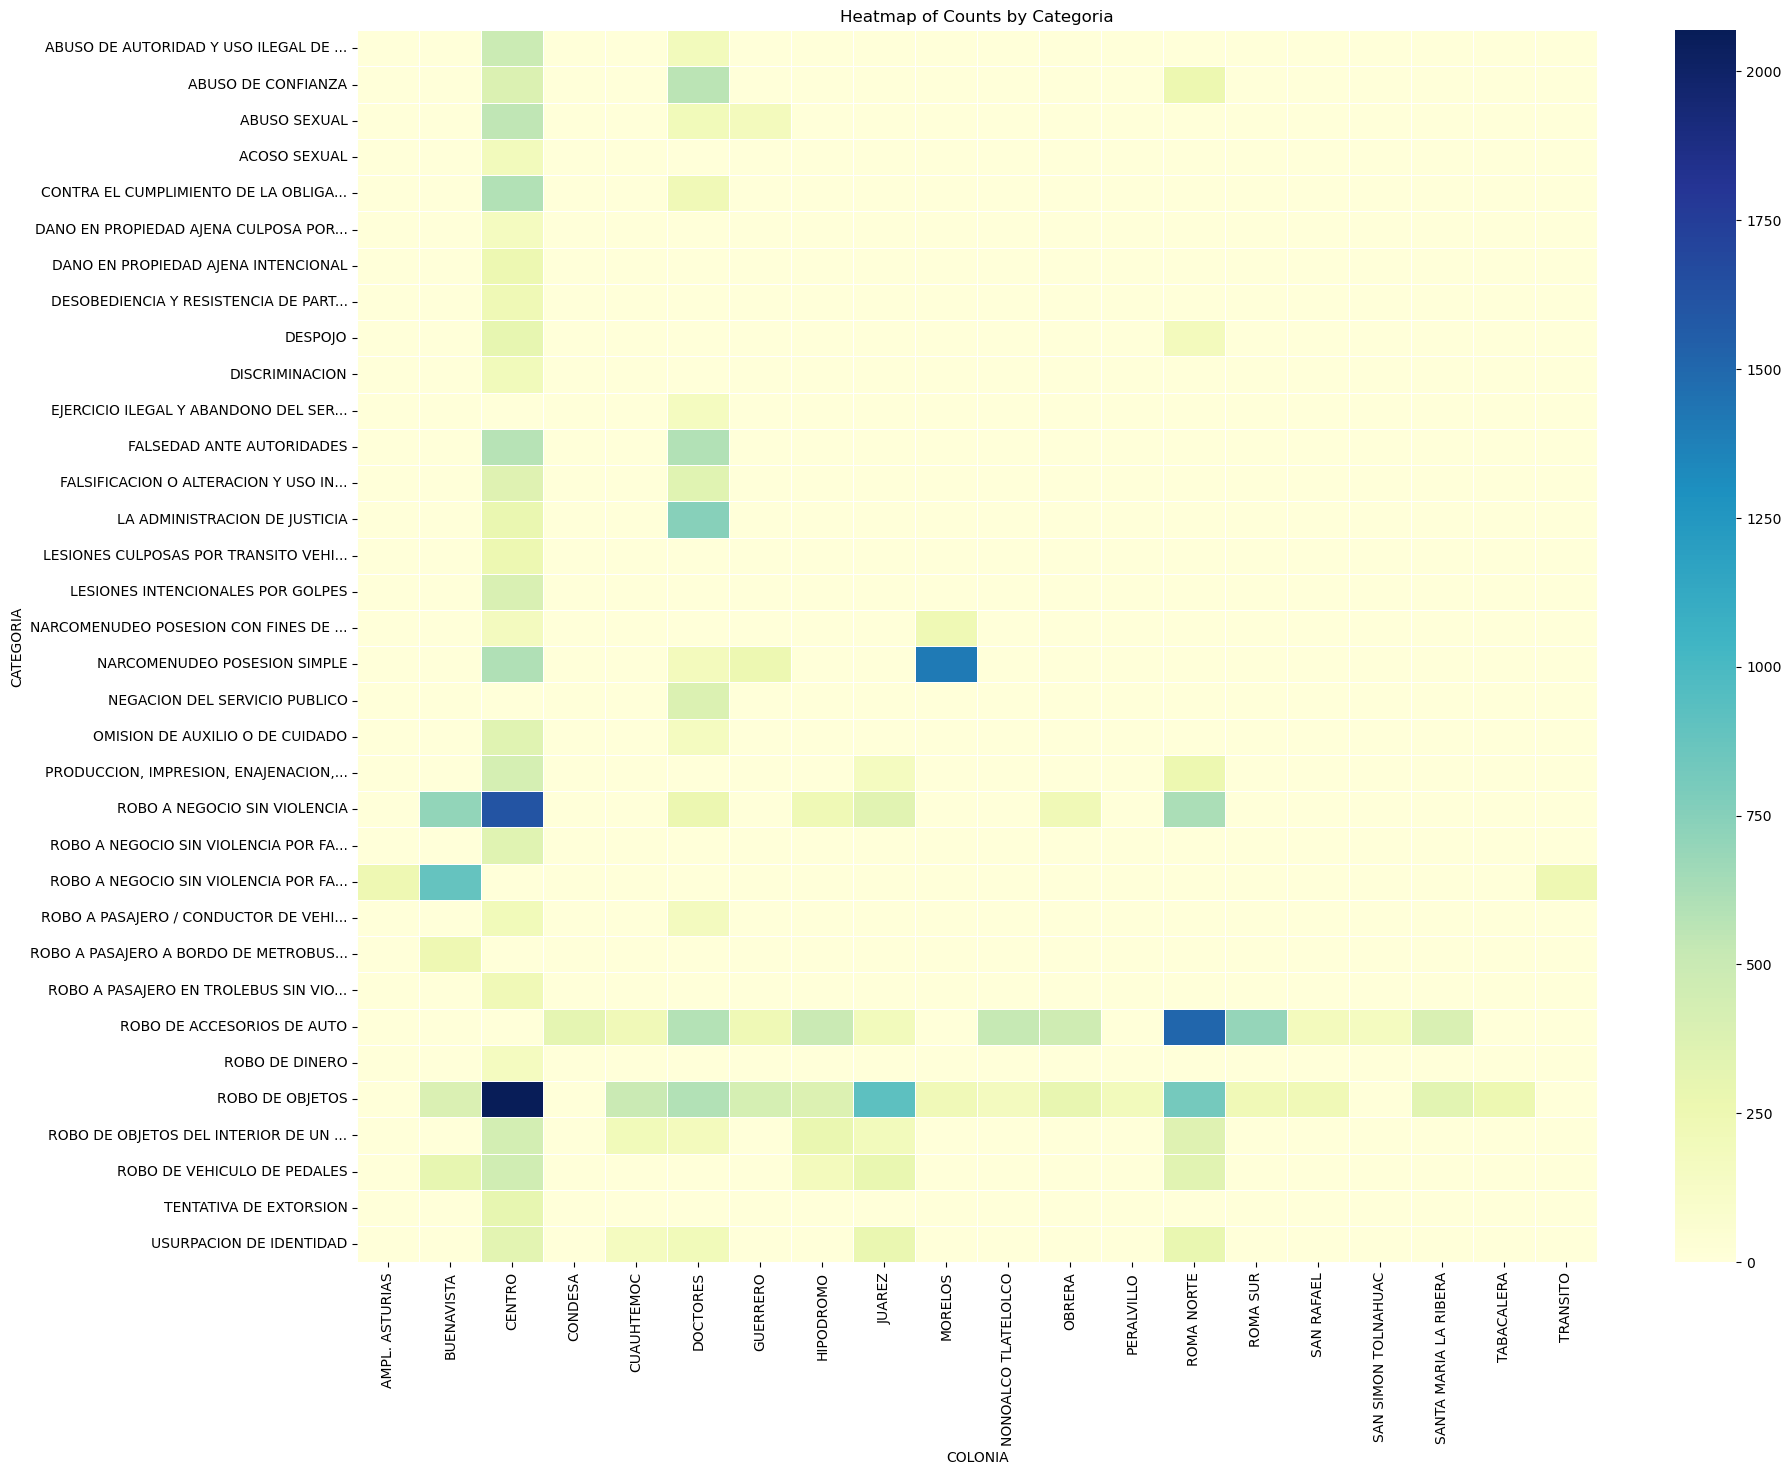

In [19]:

values_to_drop = ['FRAUDE', 'AMENAZAS', 'VIOLENCIA FAMILIAR']
rows_to_drop = cuau_bajo['delito'].isin(values_to_drop)

heatmap_data = cuau_bajo[~rows_to_drop].head(100).pivot_table(index='delito',
                                                    columns='colonia',
                                                    values='count',
                                                    fill_value=0,
                                                    aggfunc='sum')

heatmap(heatmap_data, 'Heatmap of Counts by Categoria','COLONIA','CATEGORIA')


This heatmap shows:
- There is a lot of crimes reported in *Colonia Centro*, specially in crime *Robo de Objetos*
- After Colonia *Centro*, colonia *Doctores* also has a higher amount of reported crimes than other colonias
- Roma Norte colonia has a lot of autoparts stolen crimes (Robo de Accesorios de Autos) 

A similar analysis will be made, but considering only columns related to thefts and violent crimes on the streets that would make a visitor hesitate to visit a particular zone

In [20]:
#cuau_robos = cuau_delitos[]
additional_crimes = [  
    "ABUSO SEXUAL",
    "ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA",
    "LESIONES INTENCIONALES POR GOLPES",
    "OMISION DE AUXILIO O DE CUIDADO",
    "ACOSO SEXUAL",
    "ROBO DE PLACA DE AUTOMOVIL",
    "NEGACION DEL SERVICIO PUBLICO",
    "PRIVACION DE LA LIBERTAD PERSONAL",
    "CONTRA LA INTIMIDAD SEXUAL",
    "LESIONES INTENCIONALES POR ARMA BLANCA",
    "SUSTRACCION DE MENORES",
    "LESIONES CULPOSAS" ,
    "LESIONES INTENCIONALES",
    "RETENCION O SUSTRACCION DE MENORES INCAPACES",
    "CORRUPCION DE PERSONAS MENORES DE EDAD O PERSONAS QUE NO TENGAN CAPACIDAD PARA COMPRENDER EL SIGNIFICADO DEL HECHO O DE PERSONAS QUE NO TENGAN CAPACIDAD DE RESISTIR LA CONDUCTA",
    "TENTATIVA DE HOMICIDIO",
    "TRATA DE PERSONAS",
    "TORTURA",
    "SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSION)"
]


rows_to_use = cuau_delitos['delito'].str.contains('ROBO') | cuau_delitos['delito'].isin(additional_crimes)
cuau_robos = cuau_delitos[rows_to_use].copy()
cuau_robos.sort_values(by = 'count', ascending = False)

,colonia,categoria,delito,count
791,CENTRO,DELITO DE BAJO IMPACTO,ROBO DE OBJETOS,2069
761,CENTRO,DELITO DE BAJO IMPACTO,ROBO A NEGOCIO SIN VIOLENCIA,1610
870,CENTRO,ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1556
3041,ROMA NORTE,DELITO DE BAJO IMPACTO,ROBO DE ACCESORIOS DE AUTO,1507
2133,JUAREZ,DELITO DE BAJO IMPACTO,ROBO DE OBJETOS,918
...,...,...,...,...
1385,ESPERANZA,DELITO DE BAJO IMPACTO,LESIONES INTENCIONALES,1
4274,VISTA ALEGRE,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A REPARTIDOR SIN VIOLENCIA,1
9,ALGARIN,DELITO DE BAJO IMPACTO,CORRUPCION DE PERSONAS MENORES DE EDAD O PERSO...,1
3029,ROMA NORTE,DELITO DE BAJO IMPACTO,ROBO A PASAJERO A BORDO DE TRANSPORTE PUBLICO ...,1


In [21]:
additional_crimes = [  
    "ABUSO SEXUAL",
    "ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA",
    "LESIONES INTENCIONALES POR GOLPES",
    "ACOSO SEXUAL",
    "PRIVACION DE LA LIBERTAD PERSONAL",
    "CONTRA LA INTIMIDAD SEXUAL",
    "LESIONES INTENCIONALES POR ARMA BLANCA",
    "SUSTRACCION DE MENORES",
    "LESIONES CULPOSAS" ,
    "LESIONES INTENCIONALES",
    "TENTATIVA DE HOMICIDIO",
    "TRATA DE PERSONAS",
    "TORTURA",
    "SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSION)"
]

rows_to_use = cuau['delito'].str.contains('ROBO') | cuau['delito'].isin(additional_crimes)| cuau['categoria'].str.contains('ROBO')
cuau_robos2 = cuau[rows_to_use] 

In [22]:
cuau_robos2.head()

,idcarpeta,delito,categoria,alcaldia,colonia,sexo_fem,edad,tipopersona,calidadjuridica,anio_denuncia,...,colonia_alt,crimen_lat,crimen_lon,hecho_time,denuncia_time,cve_col,clasif,alc,cve_alc,polygon
0,8324479,ROBO A TRANSEUNTE A BORDO DE TAXI PUBLICO Y PR...,DELITO DE BAJO IMPACTO,CUAUHTEMOC,DOCTORES,0,39,FISICA,VICTIMA Y DENUNCIANTE,2019,...,DOCTORES I,19.42244,-99.15237,2018-12-25 04:00:00,2019-01-04 13:16:00,015-010,COLONIA,CUAUHTEMOC,15,"[[-99.15519890116673, 19.40656058216308], [-99..."
1,8324482,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,MORELOS,0,40,FISICA,OFENDIDO,2019,...,MORELOS II,19.44962,-99.12782,2018-12-23 10:00:00,2019-01-04 13:19:00,015-019,COLONIA,CUAUHTEMOC,15,"[[-99.13938480039275, 19.44401178894581], [-99..."
2,8324485,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,ROMA NORTE,0,37,FISICA,OFENDIDO,2019,...,ROMA NORTE III,19.41359,-99.15729,2018-12-31 11:00:00,2019-01-04 13:23:00,015-024,COLONIA,CUAUHTEMOC,15,"[[-99.17671177030077, 19.420286327194944], [-9..."
3,8324496,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CUAUHTEMOC,JUAREZ,0,36,FISICA,VICTIMA Y DENUNCIANTE,2019,...,JUAREZ,19.42676,-99.16640,2019-01-03 15:00:00,2019-01-04 13:35:00,015-017,COLONIA,CUAUHTEMOC,15,"[[-99.17571912544206, 19.422519931378844], [-9..."
4,8324527,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CUAUHTEMOC,GUERRERO,0,32,FISICA,VICTIMA Y DENUNCIANTE,2019,...,GUERRERO III,19.43769,-99.14753,2018-12-22 18:34:00,2019-01-04 13:59:00,015-014,COLONIA,CUAUHTEMOC,15,"[[-99.14910747563131, 19.437890366845085], [-9..."


In [23]:
cuau_robos2.columns

Index(['idcarpeta', 'delito', 'categoria', 'alcaldia', 'colonia', 'sexo_fem',
       'edad', 'tipopersona', 'calidadjuridica', 'anio_denuncia',
       'mes_denuncia', 'fecha_denuncia', 'hora_denuncia', 'competencia',
       'anio_hecho', 'mes_hecho', 'fecha_hecho', 'hora_hecho', 'colonia_alt',
       'crimen_lat', 'crimen_lon', 'hecho_time', 'denuncia_time', 'cve_col',
       'clasif', 'alc', 'cve_alc', 'polygon'],
      dtype='object')

In [27]:
columns_to_use = ['idcarpeta', 'delito', 'categoria', 'alcaldia', 'colonia', 'sexo_fem', 'edad',
                  'anio_hecho',	'colonia_alt', 'crimen_lat', 'crimen_lon','hecho_time','denuncia_time']		
cuau_robos_simp = cuau_robos2[columns_to_use]
cuau_robos_simp.to_csv('../datasets/cuau_robos_simp.csv', index=False)



Next steps in this notebook should be creating more visualizations using a cuau_robos2 or cuau_robos_simp dataset with aggregations, so that more conclusions regarding the thefts in colonia Cuauhtemoc are extracted